In [56]:
import numpy as np 
import scipy as cp 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import re

In [3]:
cd ..

/Users/zehaodong/Desktop/alarm_fatigue


In [4]:
ls

Change_point.pdf
IEEE.pdf
Preprocessing/
Rssa.pdf
US20140043164.pdf
[Nina_Golyandina,_Vladimir_Nekrutkin,_Anatoly_A_Zh(b-ok.org).pdf
data/
new_file/
pySSA-master/


In [5]:
cd data

/Users/zehaodong/Desktop/alarm_fatigue/data


In [6]:
AdmData = pd.read_csv('AdmData.csv')
AlarmTable = pd.read_csv('AlarmTable_v2.csv', error_bad_lines = False)
ComplicationTime = pd.read_csv('ComplicationTimes.csv', error_bad_lines = False)
DescriptionTable = pd.read_csv('DescriptionTable.csv', error_bad_lines = False, encoding = 'ISO-8859-1')

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
AlarmTable_column_name = ['ID', 'alarmstarttime', 'AlarmLevel', 'AlarmParcode', 'AlarmMessage', 'AlarmDuration', 'AlarmComment']

In [7]:
import matplotlib.pyplot as plt
import re

In [11]:
def AlarmMessage_indicator():
    pattern = re.compile(r'([A-Z]+\d*\s*)+|\s') #pattern is used to match the type of alarm
    Alarm_type=[]
    n=0
    for row in AlarmTable.iterrows():
        if not isinstance(row[1]['AlarmMessage'],str):
            continue
        else:
            m = pattern.match(row[1]['AlarmMessage'])
            Alarm_type.append(m.group())
    Alarm_type_levels = list(set(Alarm_type))
    level_label = zip(range(len(Alarm_type_levels)),Alarm_type_levels)
    return {n:alarm_type for n,alarm_type in level_label}

In [12]:
Alarm_type_dict = AlarmMessage_indicator()

In [14]:
d = AlarmTable['AlarmMessage'].as_matrix()
d.shape

(955674,)

# Object to store all information for each patient

In [18]:
class Patient(object):
    def __init__(self,id):
        self.id = id

    def patient_alarm_record(self):
        store_value_list=[[],[],[],[],[],[],[],[]]
        for row in AlarmTable.iterrows():
            if((row[1]['ID']==self.id)):
                ind = 0
                for val in row[1]:
                    store_value_list[ind].append(val)
                    ind += 1
        col_name = ['ID','alarmstarttime','AlarmLevel','AlarmParcode','AlarmMessage','AlarmDuration']
        store_value_list = store_value_list[1:7]
        Patient = pd.DataFrame({k:v for k,v in zip(col_name,store_value_list)})
        return Patient 
    
    def patient_certain_alarm_message(self,k):
        # k is the key in dictionary corresponding to alarm type of interest
        Patient = self.patient_alarm_record()
        store_value_list=[[],[],[],[],[],[]]
        pattern = re.compile(Alarm_type_dict[int(k)])
        for row in Patient.iterrows():
            if isinstance(row[1]['AlarmMessage'],str) and pattern.match(row[1]['AlarmMessage']):
                ind = 0
                for val in row[1]:
                    store_value_list[ind].append(val)
                    ind += 1
        col_name = ['AlarmDuration','AlarmLevel','AlarmMessage','AlarmParcode','ID','alarmstarttime']
        Patient_alarm_message = pd.DataFrame({k:v for k,v in zip(col_name,store_value_list)})
        patient_alarm_message = Patient_alarm_message['AlarmMessage'].as_matrix()
        levels_of_message = [int(n.split()[-1]) for n in patient_alarm_message]
        start_time = Patient_alarm_message['alarmstarttime'].as_matrix()
        level = Patient_alarm_message['AlarmLevel'].as_matrix()
        parcode = Patient_alarm_message['AlarmParcode'].as_matrix()
        duration = Patient_alarm_message['AlarmDuration'].as_matrix()
        return levels_of_message, start_time, level, parcode, duration
    
    def patient_physiological_data(self):
        if not os.path.exists('/Users/zehaodong/Desktop/alarm_fatigue/data/NICU_Physiological_Data/%d.csv'%(self.id)):
            print('There are no relevant physiological data for patient with id %d'%(self.id))
        else:
            df_phy_data = pd.read_csv('/Users/zehaodong/Desktop/alarm_fatigue/data/NICU_Physiological_Data/%d.csv'%(self.id))
        partime = df_phy_data['ParTime'].as_matrix()
        low_bp = df_phy_data['AR1.D'].as_matrix()
        mean_bp = df_phy_data['AR1.M'].as_matrix()
        high_bp = df_phy_data['AR1.S'].as_matrix()
        HR = df_phy_data['HR'].as_matrix()
        cvp_2 = df_phy_data['CVP2'].as_matrix()
        return partime, low_bp, mean_bp, high_bp,HR,cvp_2
    
    def patient_whole_alarm_info(self):
        Patient = self.patient_alarm_record()
        start_time = Patient['alarmstarttime'].as_matrix()
        level = Patient['AlarmLevel'].as_matrix()
        parcode = Patient['AlarmParcode'].as_matrix()
        duration = Patient['AlarmDuration'].as_matrix()
        return start_time, level, parcode, duration        

### Case Study: ART1 S HI for patient 2222 

In [19]:
patient_2222 = Patient(2222)

In [20]:
patient_2222_alarmrecord = patient_2222.patient_alarm_record()

In [21]:
def search_correspond(dic,val):
    for k in dic:
        if dic[k]==val:
            k_corresponding = k
            break
    return k_corresponding

In [28]:
search_correspond(Alarm_type_dict,'ART1 S HI ')

151

In [20]:
p_2222_partime,p_2222_low_bp,p_2222_mean_bp,p_2222_high_bp,p_2222_HR,p_2222_cvp2= patient_2222.patient_physiological_data()

In [35]:
bp = pd.Series(p_2222_mean_bp,p_2222_partime)

In [36]:
s = s[s.notnull()]

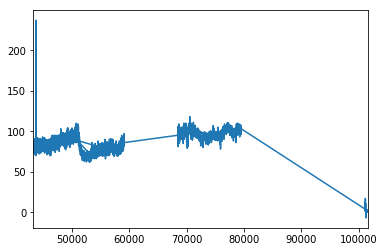

In [39]:
s.plot()
plt.show()

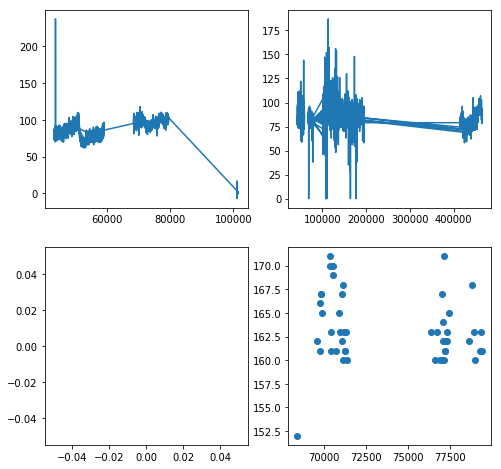

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.plot(p_2222_partime,p_2222_mean_bp)
plt.subplot(222)
plt.plot(p_2222_partime,p_2222_HR)
plt.subplot(223)
plt.plot(p_2222_partime,p_2222_cvp2)
plt.subplot(224)
plt.scatter(p_2222_start_time,p_2222_levels_of_message)
plt.show()

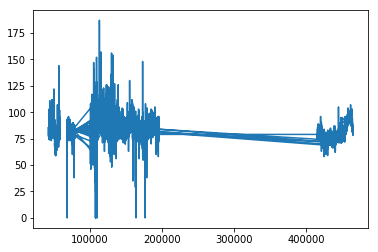

In [25]:
plt.plot(p_2222_partime,p_2222_HR)
plt.show()


In [29]:
p_2222_levels_of_message, p_2222_start_time, p_2222_level, p_2222_parcode, p_2222_duration = patient_2222.patient_certain_alarm_message(151)

In [33]:
print(p_2222_level)

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6]


In [155]:
print(p_2222_duration)

[55  2  0  2  6 16  0  6  2  6 12  6 18 10  2  6  4  4 14 10  0  0  2  0  2
  4  2  2  0  2 34  4  4  2  0  2  8 62 14 20  4  4  4 34  0  0  0 10]


In [143]:
p_2222_start_time_total, p_2222_level_total, p_2222_parcode_total, p_2222_duration_total = patient_2222.patient_whole_alarm_info()

# Function to save data

In [99]:
import codecs
import csv
def data_output_csv(A):
    A = np.array(A)
    file_name = input('Please input the file name:')
    np.savetxt('/Users/zehaodong/Desktop/alarm_fatigue/new_file/%s.csv'%(file_name), A, delimiter = ',')

### Data_all determine the order of different kind of data

In [80]:
## Useful dataset for patient 2222
## order for future conveniance
Data_all_2222 = [p_2222_partime,p_2222_low_bp,p_2222_mean_bp,p_2222_high_bp,p_2222_HR,p_2222_start_time, p_2222_level,p_2222_duration]

In [100]:
data_output_csv([p_2222_partime,p_2222_low_bp,p_2222_mean_bp,p_2222_high_bp,p_2222_HR])

Please input the file name:patient2222_physical


In [101]:
data_output_csv([p_2222_start_time, p_2222_level,p_2222_duration])

Please input the file name:patient2222_alarm


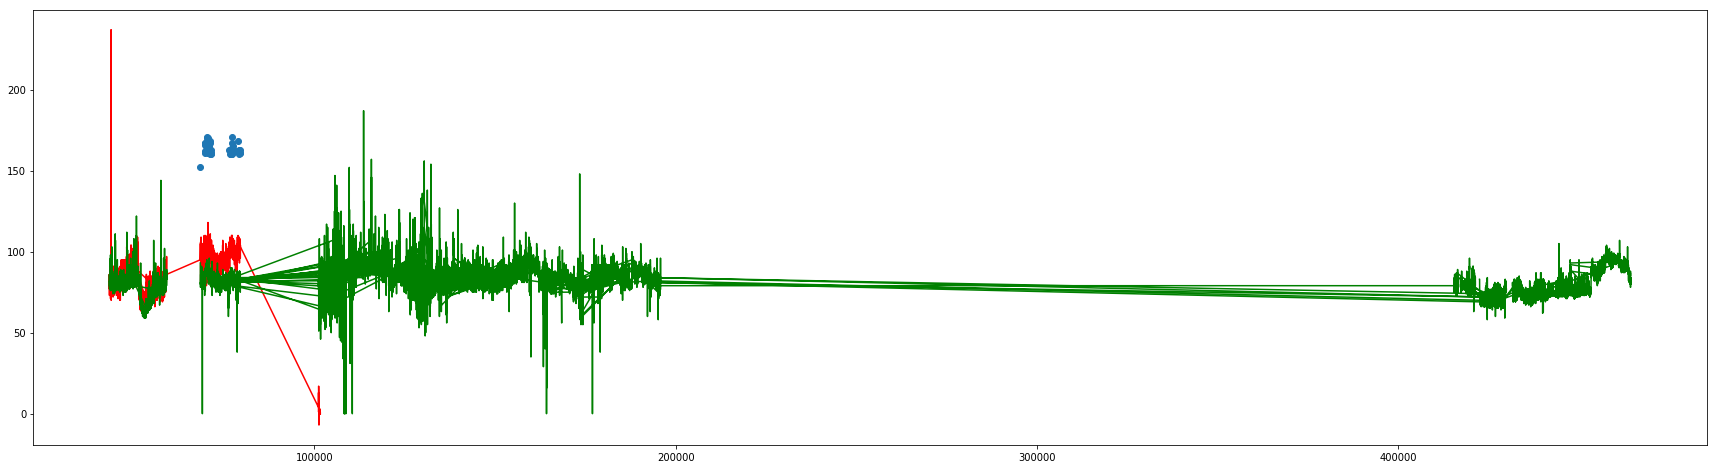

In [49]:
plt.figure(figsize=(30,8))
plot1=plt.plot(p_2222_partime,p_2222_mean_bp,c='r')
plot2=plt.plot(p_2222_partime,p_2222_HR,'g')
plot3=plt.plot(p_2222_partime,p_2222_cvp2,'b')
plot4=plt.scatter(p_2222_start_time,p_2222_levels_of_message)
plt.show()

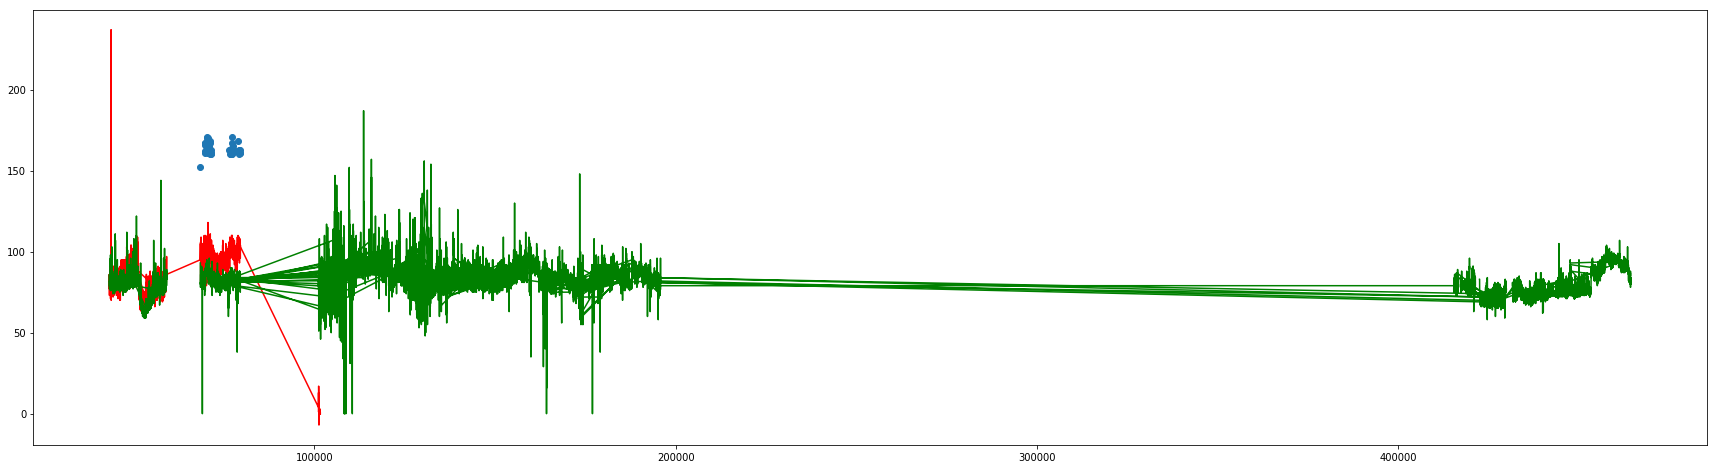

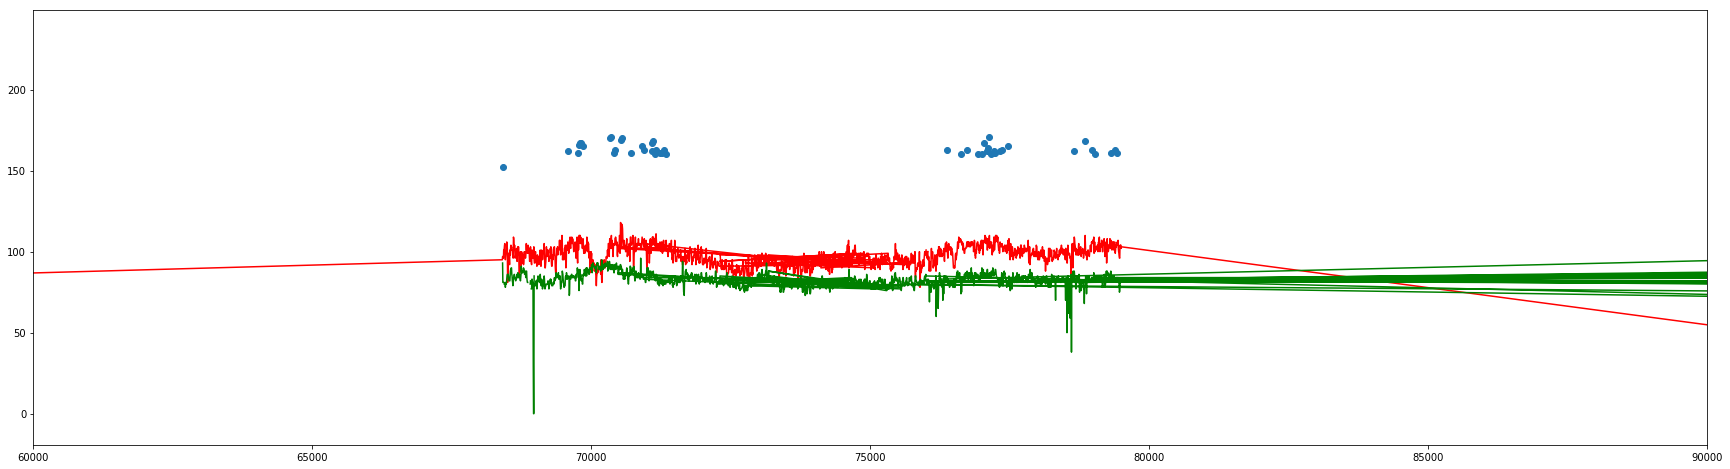

In [51]:
plt.figure(figsize=(30,8))
plot1=plt.plot(p_2222_partime,p_2222_mean_bp,c='r')
plot2=plt.plot(p_2222_partime,p_2222_HR,'g')
plot3=plt.plot(p_2222_partime,p_2222_cvp2,'b')
plot4=plt.scatter(p_2222_start_time,p_2222_levels_of_message)
plt.xlim((60000,90000))
plt.show()

In [76]:
data = [p_2222_low_bp,p_2222_mean_bp,p_2222_high_bp,p_2222_HR]
min_start_time = min(p_2222_start_time)
max_start_time = max(p_2222_start_time)
selected_data = [[],[],[],[]]
for t in range(len(p_2222_partime)):
    start_end_time = zip(p_2222_start_time,p_2222_start_time+p_2222_duration)
    g_start_end_time = (se for se in start_end_time)
    for se_t in g_start_end_time:
        if se_t[0]-30<=p_2222_partime[t] and p_2222_partime[t]<=se_t[1]-30:
            for i in range(4):
                selected_data[i].append(data[i][t])
            break

In [73]:
start_end_time = zip(p_2222_start_time,p_2222_duration)
g_start_end_time = (se for se in start_end_time)

In [79]:
print(selected_data)

[[71.0, 72.0, 74.0, 73.0, 74.0, 77.0, 82.0, 76.0, 71.0, 76.0, 83.0, 79.0, 85.0, 76.0, 78.0, 82.0, 75.0, 77.0, 76.0, 76.0, 79.0, 79.0, 86.0, 88.0, 83.0, 73.0, 82.0, 80.0, 82.0, 74.0, 80.0, 77.0, 79.0, 83.0, 82.0, 81.0, 78.0, 79.0, 78.0, 80.0, 77.0, 82.0, 73.0, 72.0, 79.0, 78.0, 81.0, 81.0, 80.0, 80.0, 81.0, 80.0, 78.0, 74.0, 76.0, 76.0, 81.0, 83.0, 80.0, 74.0, 79.0, 79.0, 80.0, 84.0, 82.0, 81.0, 82.0, 81.0, 77.0, 75.0, 75.0, 80.0, 78.0, 77.0, 76.0, 76.0, 75.0, 66.0, 72.0, 80.0, 77.0, 76.0, 76.0, 81.0, 81.0, 80.0, 73.0, 77.0], [95.0, 97.0, 97.0, 96.0, 96.0, 101.0, 101.0, 99.0, 93.0, 101.0, 110.0, 106.0, 110.0, 100.0, 105.0, 108.0, 102.0, 105.0, 104.0, 104.0, 104.0, 105.0, 109.0, 118.0, 113.0, 101.0, 105.0, 107.0, 107.0, 101.0, 107.0, 104.0, 105.0, 109.0, 109.0, 107.0, 104.0, 106.0, 102.0, 106.0, 102.0, 105.0, 100.0, 98.0, 105.0, 105.0, 106.0, 107.0, 106.0, 107.0, 108.0, 104.0, 103.0, 98.0, 101.0, 100.0, 105.0, 109.0, 109.0, 101.0, 104.0, 106.0, 106.0, 110.0, 110.0, 109.0, 109.0, 110.0, 1

Function to select data corresponding to a selected Lag from time 

In [81]:
def data_filter(Data_all,Lag):
    data = [Data_all[1],Data_all[2],Data_all[3],Data_all[4]]
    min_start_time = min(Data_all[5])
    max_start_time = max(Data_all[5])
    selected_data = [[],[],[],[]]
    for t in range(len(Data_all[0])):
        start_end_time = zip(Data_all[5],Data_all[5]+Data_all[7])
        g_start_end_time = (se for se in start_end_time)
        for se_t in g_start_end_time:
            if se_t[0]-Lag<=p_2222_partime[t] and p_2222_partime[t]<=se_t[1]-Lag:
                for i in range(4):
                    selected_data[i].append(data[i][t])
                break
    return delected_data()

## Below: Singular Spectrum Analysis to find the chang point

In [13]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [67]:
import pandas as pd

In [16]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
ts =pd.Series(np.random.randn(len(rng)), index=rng)

In [18]:
pd.infer_freq(ts.index)

'H'

In [21]:
ts.index.inferred_freq

'H'

In [25]:
type(ts.shape)

tuple

In [26]:
ts.shape[0]

72

In [28]:
ts.index.inferred_freq

'H'

In [30]:
a={'good':[1,2,3,4,3,4,5,6,7]}
a=pd.DataFrame(a)

In [38]:
a.columns.tolist

<bound method Index.tolist of Index(['good'], dtype='object')>

In [68]:
from numpy import matrix as m
import matplotlib.pylab as plb
import scipy.linalg as linalg
from pandas import DataFrame as df 

In [62]:
a = np.array([1,2,3,4,5,6,7,8,9,10,11])
m = 3

N = 6
n=1
k = n - m + 1
n=1

In [63]:
from scipy.linalg import hankel


In [58]:
hankel(a,np.zeros(m))

array([[  1.,   2.,   3.],
       [  2.,   3.,   4.],
       [  3.,   4.,   5.],
       [  4.,   5.,   6.],
       [  5.,   6.,   7.],
       [  6.,   7.,   8.],
       [  7.,   8.,   9.],
       [  8.,   9.,  10.],
       [  9.,  10.,  11.],
       [ 10.,  11.,   0.],
       [ 11.,   0.,   0.]])

In [64]:
s = hankel(a[n+1:n+m+1],a[m+n:n+N+1])

In [66]:
s

array([[3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]])

In [69]:
c = m(s)

In [70]:
c.dot(c.T)

matrix([[ 86, 104, 122],
        [104, 126, 148],
        [122, 148, 174]])

In [70]:
c

matrix([[3, 4, 5, 6],
        [4, 5, 6, 7],
        [5, 6, 7, 8]])

In [72]:
c[:,0]

matrix([[3],
        [4],
        [5]])

In [74]:
c.shape[1]

4

In [82]:
s = m([[1]])

In [83]:
s

matrix([[1]])

In [85]:
s[0,0]

1

In [95]:
m(c)

matrix([[3, 4, 5, 6],
        [4, 5, 6, 7],
        [5, 6, 7, 8]])

In [87]:
c = df(c)

In [89]:
c.columns=['a','s','d','f']

In [91]:
type(c['f'])

pandas.core.series.Series

In [93]:
c[c['f']==6]

,a,s,d,f
0,3,4,5,6


In [98]:
np.hstack(c[:,0],c[:,1])

TypeError: unhashable type: 'slice'

In [100]:
b=1/np.array([1,2,3,4,5])

In [102]:
b[b>.5]=100

In [103]:
b

array([ 100.        ,    0.5       ,    0.33333333,    0.25      ,    0.2       ])

In [105]:
b[b<20] = 1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [107]:
import pandas as pd
df1 = pd.DataFrame([{'col1':'a', 'col2':1}, {'col1':'b', 'col2':2}])
df2 = pd.DataFrame([{'col1':'a', 'col3':11}, {'col1':'c', 'col3':33}])

data = pd.merge(left=df1, right=df2, how='left', left_on='col1', right_on='col1')
print (data)

print (data.where(data.notnull(), None))

  col1  col2  col3
0    a     1  11.0
1    b     2   NaN
  col1  col2  col3
0    a     1    11
1    b     2  None


In [110]:
for i in range(2,10):
    print(i)

2
3
4
5
6
7
8
9


In [111]:
abs(np.array([1,-1,2]))

array([1, 1, 2])

In [112]:
x = [1,2,3,4,5,5]
y = [2,3,4,5,6,7]


In [113]:
import matplotlib.pyplot as plt 

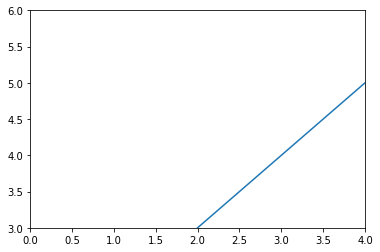

In [132]:
plt.figure()
plt.axis([0,4,3,6])
plt.plot(x,y)
plt.show()

In [136]:
i = [1,2,3,4,5]
1 in i

True